# Exercice AutoEncoder

## Complétez les tâches ci-dessous

**Tâche : Lancer les importations ci-dessous**

In [64]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

**Les données**

Le tableau ci-dessous indique la consommation moyenne de 17 types d'aliments en grammes par personne et par semaine pour chaque pays du Royaume-Uni.

Le tableau montre quelques variations intéressantes entre les différents types d'aliments, mais les différences globales ne sont pas si notables. 

**Tâche : Exécuter la ligne d'importation ci-dessous pour lire les données**

In [65]:
# dataset UK_foods.csv présent dans le dossier DATA de la formation
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/UK_foods.csv'
df = pd.read_csv(url,index_col='Unnamed: 0')

# df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

**Tâche : Afficher le DataFrame**

In [66]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**Tâche : Transposer le DataFrame de sorte que les colonnes constituent maintenant l'index.**

In [67]:
data=df.transpose()

In [68]:
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**Tâche : Créer une carte thermique (Heatmap) à partir du DataFrame. Y a-t-il un pays qui se distingue vraiment des autres ? Il devrait être difficile de le distinguer uniquement à partir de l'image. Est-ce que deux pays semblent très similaires ?**

<AxesSubplot:>

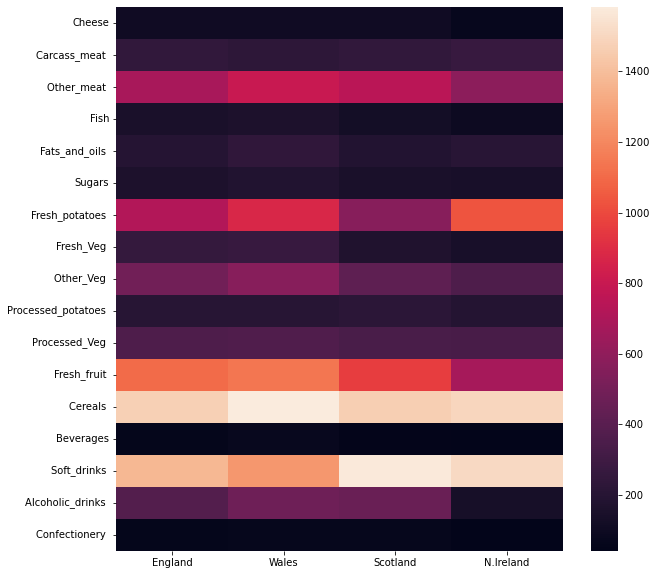

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df)

**Tâche : Faire les importations nécessaires pour construire un auto-encodeur. Notre objectif sera de réduire les dimensions de 17 --> 2 et de voir si certains pays se distinguent par leur grande différence.**

In [70]:
data.shape

(4, 17)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Tâche : Créer un encodeur. Dans les solutions proposées, nous en avons construit un qui allait de 17 --> 8 --> 4 --> 2**

In [71]:
encoder=Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation="relu",input_shape=[8]))
encoder.add(Dense(2,activation="relu"))


**Tâche : Créer un décodeur. Dans les solutions, nous en avons construit un qui allait de 2-->4-->8-->17**

In [72]:
decoder=Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation="relu",input_shape=[4]))
decoder.add(Dense(17,activation="relu"))

**Tâche : Combiner l'encodeur et le décodeur pour en faire un autoencodeur.**

In [73]:
autoencoder=Sequential([encoder,decoder])

In [74]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

D:\Developpement\Coding\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Tâche : Créer un MinMaxScaler pour mettre les données à l'échelle. Veillez à transposer les données, car nous avons en réalité 17 colonnes de features et seulement 4 lignes (une par pays).**

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df.transpose().values)

In [79]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [80]:
scaled_data.shape

(4, 17)

**Tâche : Adapter l'auto-encodeur aux données mises à l'échelle pour 15 epochs.**

In [81]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 251ms/step - loss: 0.4152
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 3/15
1/1 [==============================] - 0s 0s/step - loss: 0.2992
Epoch 4/15
1/1 [==============================] - 0s 0s/step - loss: 0.2881
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2876
Epoch 6/15
1/1 [==============================] - 0s 0s/step - loss: 0.3122
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3256
Epoch 8/15
1/1 [==============================] - 0s 0s/step - loss: 0.3864
Epoch 9/15
1/1 [==============================] - 0s 0s/step - loss: 0.3455
Epoch 10/15
1/1 [==============================] - 0s 0s/step - loss: 0.3108
Epoch 11/15
1/1 [==============================] - 0s 0s/step - loss: 0.2873
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2702
Epoch 13/15
1/1 [==============================] - 0s 0s/step - loss: 0.2516
E

**Tâche : Passer les données mises à l'échelle uniquement dans l'encodeur et prédire la sortie à dimension réduite. Note : Vous obtiendrez très probablement des résultats différents des nôtres en raison des initialisations aléatoires.**

In [82]:
encoder_2d=encoder.predict(scaled_df)

In [83]:
encoder_2d

array([[0.813917  , 0.9983156 ],
       [0.9889256 , 1.2128698 ],
       [0.64324665, 0.8105123 ],
       [0.01833773, 0.1189453 ]], dtype=float32)

**Tâche : Associer les données bidimensionnelles encodées à l'index des pays d'origine. Bien vérifier l'ordre de l'index pour vous assurer qu'il est correctement joint. Il y a plusieurs façons de faire cela avec Pandas.**

In [87]:
result=pd.DataFrame(data=encoder_2d,index=df.transpose().index,columns=["C1","C2"])

In [88]:
result

,C1,C2
England,0.813917,0.998316
Wales,0.988926,1.212870
Scotland,0.643247,0.810512
N.Ireland,0.018338,0.118945


In [95]:
result=result.reset_index()

In [96]:
result

,index,C1,C2
0,England,0.813917,0.998316
1,Wales,0.988926,1.212870
2,Scotland,0.643247,0.810512
3,N.Ireland,0.018338,0.118945


**Tâche : Tracez maintenant ces résultats dans un nuage de points, étiquetés par leur pays respectif. Vous devriez voir l'Irlande du Nord plus éloignée des autres points (mais pas nécessairement à gauche ou à droite, elle pourrait être centrée plus loin des autres).**

<AxesSubplot:xlabel='C1', ylabel='C2'>

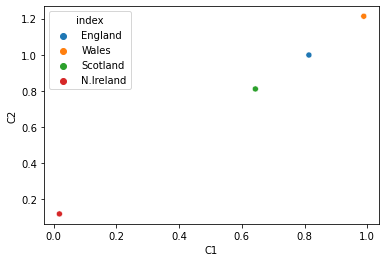

In [97]:
sns.scatterplot(x="C1",y="C2",hue="index",data=result)